# to use Logistic regression the data should be linearly Seprable it is the prequiste which means it can be easily seprate by a line 

Accuracy: 0.88


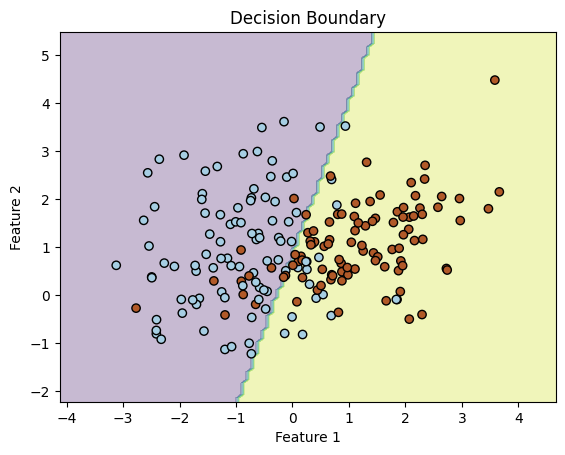

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate linearly separable data
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(model, X, y)

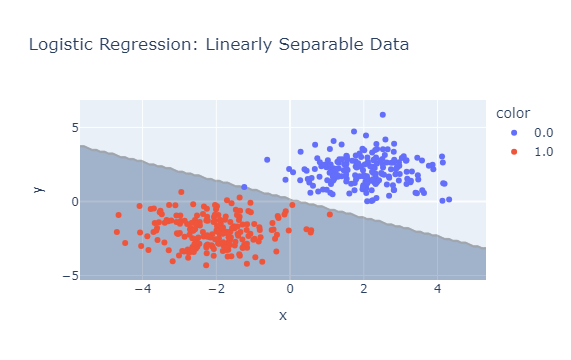

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate linearly separable data
np.random.seed(42)
n_samples = 200
X1 = np.random.randn(n_samples, 2) + np.array([2, 2])
X2 = np.random.randn(n_samples, 2) + np.array([-2, -2])
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Create a mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot data points
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=y.astype(str), title="Logistic Regression: Linearly Separable Data")

# Add decision boundary
fig.add_trace(go.Contour(x=np.linspace(x_min, x_max, 100), y=np.linspace(y_min, y_max, 100), z=Z, 
                          showscale=False, colorscale='Blues', opacity=0.3))

fig.show()


# Since we have to seprate the data using a line that means this data is linearly seprable so technically i have to find that line that can seprate them its asme as Linearregssion line bu the thing that makes it diffrent is that the eq is AX+By+C=0(AX1+BX2+C=0)

# Perceptrion says select a random point and we will ask that point wherther the line we created is correct or not if not then the line remain same and now it checks a 2 point and then 2 point says so the line is wrong so the 2 point says come towars me and then the blue point is coreect

# Logisitic Regresssion

In [54]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [55]:

import matplotlib.pyplot as plt
%matplotlib notebook


In [57]:
def step(z):
    return 1 if z>0 else 0
    

In [58]:
def perceptron(X,y):

    # np.insert is use to add 1 at 0 index so that we can add bias to the model
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [59]:
intercept_,coef_ = perceptron(X,y)

In [60]:
print(coef_)
print(intercept_)

[1.31579644 0.1538201 ]
1.0


In [61]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [27]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

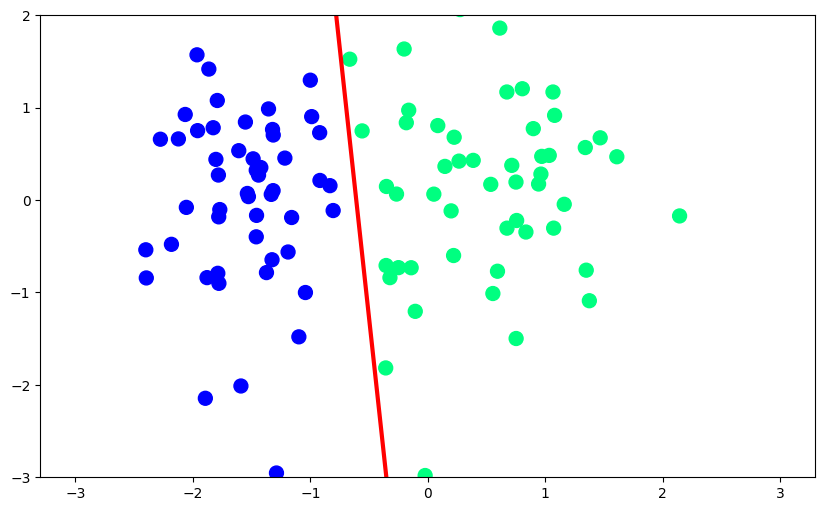

In [28]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.pl
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [31]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [32]:
m,b = perceptron(X,y)

In [35]:

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [40]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [41]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])


In [42]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [47]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<IPython.core.display.Javascript object>

(-3.0, 2.0)

In [45]:
import IPython

# Logisitic function in the Sigmoid function

# Earlier we use to push the line after a point and then ask that code wether its coreectly classified or not and if not then it will move after that line But not in this Sigmoid function we will check if the point is CORRECTLY CLASSIFED OR not If is CLASSIFIED PERFECTLY then we will push it away grom it

# SO THAT MEANS IF THE POINT IS CORRECTLY CLASSFIED WE PUSH THE LINE AND IF IT IS NOT WE WILL PULL TOWARDS IT (this overcome ths problem that was not solved by the Preceptron TRICK)

# THE MAGINITUDE OF PUSH AND PULL DEPENDS ON THE DISTANCE BETWEEN THE POINTS WHICH MEANS IF IT IS TOO FAR THEN HIGHER MAGNITUDE WILL ATTRACT EACH OTHER AND INVERSLY IN CASE PUSHING

# Logistic Regression - Sigmoid Function

## Sigmoid Function Definition
In **logistic regression**, we use the **sigmoid function** to map any real-valued number into the range **(0,1)**, making it useful for probability estimation.

The **sigmoid function** is mathematically defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

where:
- \( x \) is the input (linear combination of weights and features in logistic regression),
- \( e \) is Euler's number (**≈ 2.718**).

## Python Implementation of Sigmoid Function
Below is the Python implementation of the **sigmoid function**:

```python
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Example usage
x = np.array([-2, -1, 0, 1, 2])
sigmoid_values = sigmoid(x)
print(sigmoid_values)


# LOSS FUNCTIONS IN LOGISTIC REGRESSION

# so IN maximum licklhood we have to minimize the error and the main thing is MAXIMUM LIKELY HOOD SHOULD BE HIGH but in real life there might be millions of point so it will be hard to calcluate so instead of MUltiply we will use LOG so that it cannot beoceome very high value but there is one problem that value of these log would come between 0-1 so to over come we will use -log which means we will use -log and this is called cross entropy 
# in cross entrop it should be mini mize